In [1]:
# panda v1.5 above (p.2-28)
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
pd.get_dummies(df, columns=["color"], prefix='is', prefix_sep='_')

,size,price,classlabel,is_blue,is_green,is_red
0,M,10.1,class1,False,True,False
1,L,13.5,class2,False,False,True
2,XL,15.3,class1,True,False,False


In [2]:
df2 = pd.get_dummies(df, columns=["color"], prefix='is', prefix_sep='_')
pd.from_dummies(df2[['is_blue', 'is_green', 'is_red']], sep='_')

,is
0,green
1,red
2,blue


In [3]:
#-- §2-6 p.2-29 --#
from sklearn.preprocessing import OneHotEncoder

X = [['Male', 1], ['Female', 3], ['Female', 2]]
encoder = OneHotEncoder(handle_unknown='ignore')
X_new = encoder.fit_transform(X)
X_new.toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [4]:
# 顯示類別
encoder.categories_


[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [5]:
# inverse_transform 可還原為原值
X_org = encoder.inverse_transform(X_new)
X_org

array([['Male', 1],
       ['Female', 3],
       ['Female', 2]], dtype=object)

In [6]:
# One-hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
color_new = encoder.fit_transform(df[['color']])

# get_feature_names_out 產生新的欄位名稱；feature_names_in_ 可取得原欄位名稱
column_names = encoder.get_feature_names_out(encoder.feature_names_in_)

df_new = pd.DataFrame(color_new.toarray(), columns=column_names)
df_new


,color_blue,color_green,color_red
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0


In [ ]:
"""
【sklearn中fit、fit_transform、transform的區別】
https://www.cupoy.com/post/0000017EA058A745000000016375706F795F72656C656173654B5741535354434C55424E455753

fit：原義指的是安裝、使適合的意思，其實有點train的含義但是和train不同的是，它並不是一個訓練的過程，而是一個適配的過程，過程都是定死的，最後只是得到了一個統一的轉換的規則模型。
transform：是將資料進行轉換，比如資料的歸一化和標準化，將測試資料按照訓練資料同樣的模型進行轉換，得到特徵向量。
fit_transform：可以看做是fit和transform的結合，如果訓練階段使用fit_transform，則在測試階段只需要對測試樣本進行transform就行了。

【scikit-learn 數據預處理-fit_transform()與transform()之差異】
https://medium.com/@maggieliao.cm04g/scikit-learn-%E6%95%B8%E6%93%9A%E9%A0%90%E8%99%95%E7%90%86-fit-transform-%E8%88%87transform-%E4%B9%8B%E5%B7%AE%E7%95%B0-3c7cc07c124f

fit_transform():
fit_transform(partData)是先對partData作fit()的功能，找到該partData的整體統計特性之指標，如平均值、標準差、最大最小值等等(能依據不同目的套用這些指標在不同的轉換(即後面的transform()動作)上，再實行transform(partData)以對partData進行標準化(英文稱為normalization, 主要有兩種方法: min-max normalization or standard deviation normalization)或歸一化等動作.
根據之前fit(partData)所找出來，對於剩餘數據（restData）使用相同的平均值、標準差、最大/最小值等指標進行轉換 transform(restData)，從而保證partData、restData是以同樣的統計指標下去作標準化等轉換之資料前處理。
"""

In [7]:
# 刪除原欄位 'color'
df.drop(['color'], axis=1, inplace=True)

# 合併表格
df2 = pd.concat([df, df_new], axis=1)
df2

,size,price,classlabel,color_blue,color_green,color_red
0,M,10.1,class1,0.0,1.0,0.0
1,L,13.5,class2,0.0,0.0,1.0
2,XL,15.3,class1,1.0,0.0,0.0


In [8]:
# 存檔
import joblib

joblib.dump(encoder, 'joblib')

['joblib']

In [10]:
#-- p.2-32 --#
"""
pip install yfinance --upgrade --no-cache-dir
"""
import pandas as pd
import yfinance as yf

df_quote = yf.download('1101.TW', start='2020-01-01', end='2024-11-19')
df_quote.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,1101.TW,1101.TW,1101.TW,1101.TW,1101.TW,1101.TW
Date,,,,,,
2024-11-12,32.450001,32.450001,32.750000,32.200001,32.700001,23022123
2024-11-13,32.450001,32.450001,32.750000,32.200001,32.250000,18150100
2024-11-14,32.349998,32.349998,32.650002,32.299999,32.450001,16571895
2024-11-15,33.150002,33.150002,33.349998,32.549999,32.599998,29588758
2024-11-18,33.250000,33.250000,33.700001,33.150002,33.250000,19238941


In [11]:
#-- CH04 --#
import numpy as np
data = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
data


array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [12]:
# 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(data) # 輸出結果：全部介於 0 ~ 1 之間

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
X, y = datasets.load_breast_cancer(return_X_y=True)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [14]:
# Foluma : X_new = ( X - min ) / ( max - min )
# values between 0 and 1
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

#clf.fit(X_train, y_train)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test)

print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

42.11%


In [16]:
# p.4-4 §4-1-2 標準化 (Standardization)
# X_new = ( X - u ) / v
# u : 平均數 ; v : 標準差

import numpy as np
data = np.array([[0,0], [0,0], [1, 1], [1, 1]])
data

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

In [17]:
# param with_mean=False : 平均數不歸 0
# param with_std=False : 標準差不為 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [18]:
# use numpy verification 
mean1 = np.mean(data, axis=0)
std1 = np.std(data, axis=0)
mean1, std1

(array([0.5, 0.5]), array([0.5, 0.5]))

In [19]:
# §4-1-3 MaxAbsScaler
# 限制變數絕對值最大為 1，其他依比例轉換，只是縮小規模，不改中心點

import numpy as np 
data = np.array([[1., -1., 2.], [2., 0., 0.], [0., 1., -1.]])
data

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [20]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit_transform(data)


array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [21]:
# use numpy verification 
max1 = np.max(data, axis=0)
data / max1

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [22]:
# §4-1-4 RobustScaler
# 類似標準化，但以中位數取代平均數，以IRQ取代標準差，希望降低離群值的影響，
# 作是將中位數歸 0，再除以 IRQ
import numpy as np
data = np.array([[1., -2., 2.], [-2., 1., 3.], [4., 1., -2.]])
data

array([[ 1., -2.,  2.],
       [-2.,  1.,  3.],
       [ 4.,  1., -2.]])

In [23]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(data)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

data=
 [[ 1. -2.  2.]
 [-2.  1.  3.]
 [ 4.  1. -2.]]


,label,最小值,箱子下緣,中位數,箱子上緣,最大值
0,0,-2.0,-0.5,1.0,2.5,4.0
1,1,-2.0,-0.5,1.0,1.0,1.0
2,2,-2.0,0.0,2.0,2.5,3.0


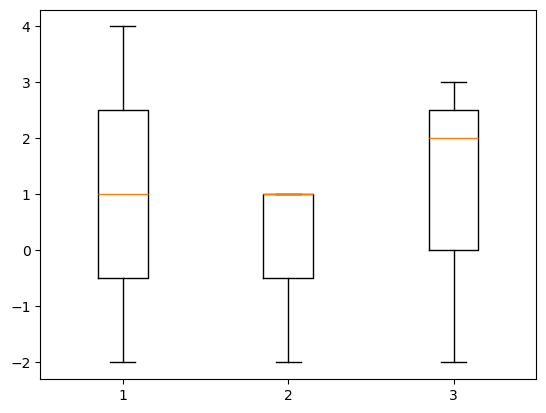

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(data, bp) :
    rows_list = []

    for i in range(data.shape[1]) :
        dict1 = {}
        dict1['label'] = i
        dict1['最小值'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['箱子下緣'] = bp['boxes'][i].get_ydata()[1]
        dict1['中位數'] = bp['medians'][i].get_ydata()[1]
        dict1['箱子上緣'] = bp['boxes'][i].get_ydata()[2]
        dict1['最大值'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)
    return pd.DataFrame(rows_list)

print('data=\n', data)
bp = plt.boxplot(data)
#print('bp=\n', bp)
get_box_plot_data(data, bp)
    

In [25]:
# 04_05_SelectKBest.ipynb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = datasets.load_iris(return_X_y=True)
X.shape

(150, 4)

In [26]:
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
X_new.shape

(150, 2)

In [27]:
# 顯示特徵分數
print('顯示特徵分數= ', clf.scores_)
# 顯示 p value
print('顯示p value= ', clf.pvalues_)

顯示特徵分數=  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
顯示p value=  [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


In [28]:
# 顯示特徵名稱
import numpy as np
ds = datasets.load_iris()
np.array(ds.feature_names)[clf.scores_.argsort()[-2:][::-1]]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [29]:
# 另一種寫法
import pandas as pd
X = pd.DataFrame(ds.data, columns=ds.feature_names)
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
clf.get_feature_names_out()

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

In [30]:
# 04_05_SelectKBest.ipynb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, chi2


In [31]:
#X, y = datasets.load_iris(return_X_y=True)
X, y = datasets.load_iris(return_X_y=True, as_frame=False)
X.shape

(150, 4)

In [53]:
print('X= ', X[0:5])
print('y= ', y)

X=  [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.

In [33]:
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
X_new.shape

(150, 2)

In [54]:
print('X_new= ', X_new[0:5])

X_new=  [[ 8.  5.  8. 11.  0.  0.  0.]
 [ 0.  0.  1.  1. 16.  0.  0.]
 [ 0.  1.  8. 16. 16.  5.  9.]
 [ 0.  0.  0.  0.  0.  9.  0.]
 [ 8.  5. 16. 15. 16.  0.  0.]]


In [35]:
print('score= ', clf.scores_)
print('pvalue= ', clf.pvalues_)

score=  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
pvalue=  [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


In [36]:
# 顯示特徵名稱 method 1
import numpy as np
ds = datasets.load_iris()
np.array(ds.feature_names)[clf.scores_.argsort()[-2:][::-1]]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [37]:
# 顯示特徵名稱 method 2
import pandas as pd
X = pd.DataFrame(ds.data, columns=ds.feature_names)
#print('X= ', X)

clf = SelectKBest(chi2, k=2)
print('clf= ', clf)
X_new = clf.fit_transform(X, y)
#print('X_new= ', X_new)
print(clf.get_feature_names_out())

clf=  SelectKBest(k=2, score_func=<function chi2 at 0x0000019B8FECB7E0>)
['petal length (cm)' 'petal width (cm)']


In [38]:
# p4-12 只選2個特徵
X = X[clf.get_feature_names_out()].values


In [43]:
# 顯示資料
X[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [44]:
# 04_06_SelectPercentile.ipynb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, chi2

In [45]:
# laod 手寫阿拉伯數字資料集
# return_X_ybool, default=False
# if True, returns (data, target) instead of a Bunch object.
X, y = datasets.load_digits(return_X_y=True) 
X.shape

(1797, 64)

In [62]:
# Test load_digits()
#print(X)
#print(y)
# 使用預設參數會傳回 Bunch 實例
digits = datasets.load_digits()
print(digits.data)
print(digits.target[:30])
#print(digits.DESCR)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


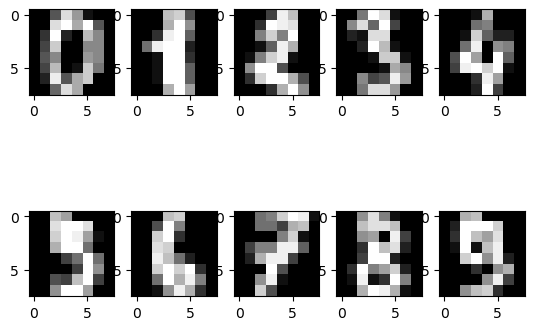

In [69]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

digits = load_digits()
plt.gray()

# https://steam.oxxostudio.tw/category/python/example/matplotlib-subplot.html
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.data[i].reshape((8, 8))) 

plt.show() 

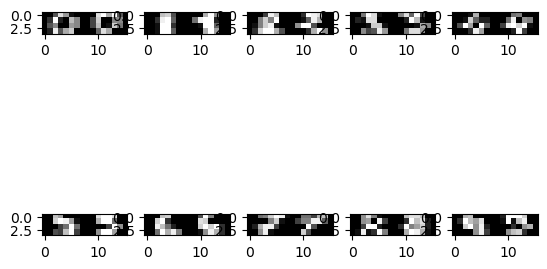

In [70]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.data[i].reshape((4, 16))) 
plt.show() 

In [46]:
clf = SelectPercentile(chi2, percentile=10)
X_new = clf.fit_transform(X, y)
X_new.shape

(1797, 7)

In [ ]:
#-- 4. 資料分割 --#
# 選擇部份特徵
X = X_new

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
#-- 特徵縮放 --#
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
#-- 5. 選擇演算法 --#
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
#-- 6. 模型訓練 --#
clf.fit(X_train_std, y_train)

In [ ]:
#-- 7. 模型計分 --#
y_pred = clf.predict(X_test_std)
y_pred

In [ ]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

In [ ]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [ ]:
# 使用全部特徵
# 載入資料集
X, y = datasets.load_digits(return_X_y=True)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 特徵縮放
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 模型訓練
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std, y_train)

# 模型計分
y_pred = clf.predict(X_test_std)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 